mnist数据分类

## 作业

1. 浮现上述代码。
2. 计算模型参数。
3. 使用不同大小的批次进行实验，观察模型收敛速度与收敛平稳性。
4. 使用不同大小的学习率进行实验，观察模型收敛速度与收敛平稳性。
5. 使用不同的激活函数进行实验，观察模型收敛速度与收敛平性能。
6. 尝试使用不同的参数初始化方法（如使用不同的正态分布、均匀分布、固定值等方法），观察模型收敛速度。
7. 思考如何改进模型以使得模型性能增强。
8. 思考如何给模型添加新的隐藏层并进行实验。

*说明：需对上述问题进行代码实现与结论总结*

In [2]:
%matplotlib inline

import numpy as np
from PIL import Image
from matplotlib import pyplot as plt

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data

In [4]:
# 下载MNIST数据集并生成DataSet对象
# 使用OneHot编码处理标记
mnist = input_data.read_data_sets('MNIST_data',one_hot=True)

Extracting MNIST_data\train-images-idx3-ubyte.gz
Extracting MNIST_data\train-labels-idx1-ubyte.gz
Extracting MNIST_data\t10k-images-idx3-ubyte.gz
Extracting MNIST_data\t10k-labels-idx1-ubyte.gz


In [5]:
# 训练集图片矩阵，代表55000张图片，每张图片为一个向量，其长度为784
mnist.train.images.shape

(55000, 784)

In [6]:
# 训练集标记矩阵，代表55000张图片的标记，每张图片为一个10维的独热编码向量
mnist.train.labels.shape

(55000, 10)

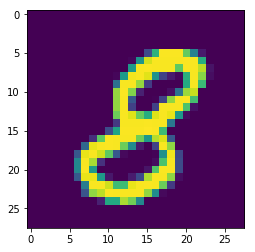

In [9]:
plt.imshow(Image.fromarray(mnist.train.images[5].reshape(28,28)))

In [10]:
mnist.train.labels[5]

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0.])

In [15]:
with tf.Graph().as_default() as g:
    #输入、标记占位符
    inputs = tf.placeholder(shape=[None,784],dtype=tf.float32)
    labels = tf.placeholder(shape=[None,10],dtype=tf.float32)
    #创建128个隐藏层神经元参数
    hidden_weight = tf.Variable(tf.random_normal([784,128]),name='hidden_weight')
    hidden_bias = tf.Variable(tf.zeros([128,]),name='hidden_bias')
    #隐藏层前向传播
    hidden_output = tf.nn.relu(tf.matmul(inputs,hidden_weight)+hidden_bias)
    #创建输出层10个神经元参数
    output_weight = tf.Variable(tf.random_normal([128,10]),name='out_weight')
    output_bias = tf.Variable(tf.zeros([10,]),name='output_bias')
    #输出层前向传播
    logits = tf.matmul(hidden_output,output_weight) + output_bias
    output = tf.nn.softmax(logits)
    
    #代价函数
    loss = tf.reduce_mean(-1 * tf.reduce_sum(labels * tf.log(output + 1e-7),axis=1))
    #正确率
    acc = tf.reduce_mean(
        tf.cast(tf.equal(tf.argmax(labels,axis=1),tf.argmax(output,axis=1)),
                tf.float32))

In [19]:
with tf.Session(graph=g) as sess:
    #定义梯度下降法优化器
    optim  = tf.train.GradientDescentOptimizer(learning_rate=0.01)
    train_op = optim.minimize(loss)
    sess.run(tf.global_variables_initializer())
    
    #训练模型
    for step in range(20000):
        batch_images, batch_labels = mnist.train.next_batch(32)
        res_loss,_ = sess.run([loss,train_op],feed_dict={
            inputs:batch_images,
            labels:batch_labels
        })
        #输出代价并验证模型
        if step % 500 == 0:
            accs = []
            for test_step in range(10000 //32):
                batch_images,batch_labels = mnist.test.next_batch(32)
                res_acc = sess.run(acc,feed_dict={
                    inputs:batch_images,
                    labels:batch_labels
                })
                accs.append(res_acc)
            accs = np.mean(accs)
            print('step %5d, loss %2.4f, acc %.4f' % (step,res_loss,accs))

step     0, loss 13.0843, acc 0.1006
step   500, loss 9.1729, acc 0.3475
step  1000, loss 8.2782, acc 0.4058
step  1500, loss 8.8394, acc 0.4290
step  2000, loss 9.6609, acc 0.4910
step  2500, loss 5.5406, acc 0.5190
step  3000, loss 6.5173, acc 0.5245
step  3500, loss 9.0664, acc 0.5314
step  4000, loss 7.2772, acc 0.5350
step  4500, loss 7.7531, acc 0.5378
step  5000, loss 5.7184, acc 0.5421
step  5500, loss 5.5406, acc 0.5435
step  6000, loss 8.0590, acc 0.5463
step  6500, loss 6.5598, acc 0.5477
step  7000, loss 7.6152, acc 0.5492
step  7500, loss 5.5406, acc 0.5504
step  8000, loss 6.6409, acc 0.5663
step  8500, loss 5.0369, acc 0.6061
step  9000, loss 6.3143, acc 0.6226
step  9500, loss 5.8571, acc 0.6289
step 10000, loss 6.8543, acc 0.6315
step 10500, loss 5.2193, acc 0.6353
step 11000, loss 5.1092, acc 0.6373
step 11500, loss 5.0692, acc 0.6399
step 12000, loss 4.0387, acc 0.6403
step 12500, loss 6.7390, acc 0.6428
step 13000, loss 3.6152, acc 0.6393
step 13500, loss 5.7998, ac